In [ ]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from lib.dataset import FolderDataset
from lib.models import ConvEncoder
from lib.utils import compute_similar_images



In [2]:
from lib.dataset import FolderDataset


transforms = T.Compose([T.ToTensor(), T.Resize([512, 512])])

full_dataset = FolderDataset('data/img_data', transforms)

encoder = ConvEncoder()

device = "cpu"
encoder.to(device)

flattened_embedding = np.load('checkpoints/data_embedding.npy')
encoder.load_state_dict(torch.load('checkpoints/encoder_model.pt'))

<All keys matched successfully>

In [3]:
from PIL import Image

test_img = Image.open('data/img_data/64.png')

img_idx = compute_similar_images(test_img, encoder, 5, flattened_embedding, device)[0][1:]
img_idx

[13241, 2561, 12942, 6326]

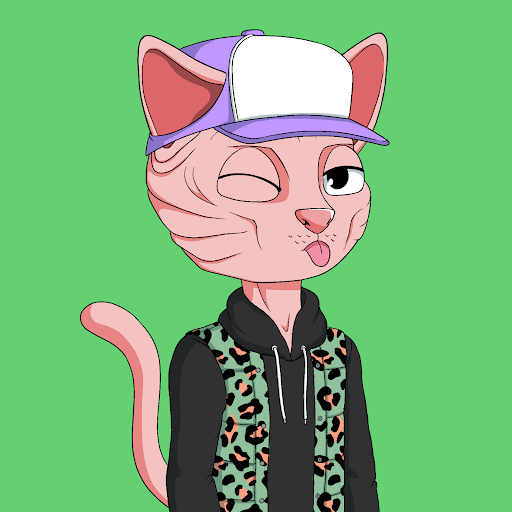

In [5]:
test_img

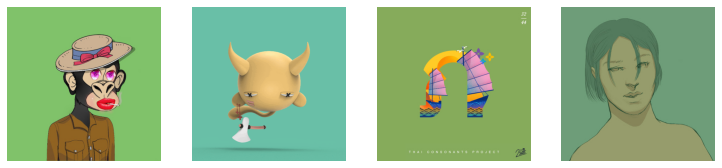

In [4]:
import os
import matplotlib.pyplot as plt
import cv2
 

pic_box = plt.figure(figsize=(16,16))
 

for i, idx in enumerate(img_idx):
    img = full_dataset[idx -1]
    pic_box.add_subplot(2,5,i+1)
    plt.imshow(img[0].permute(1, 2, 0))
    plt.axis('off')

plt.show()